#Analyzing Stockholding Patterns Through Clustering Techniques
Based on WQU project

By Ahmed Ali

##Environment set-up

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import trimmed_var
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

##Prepare Data

###Import

In [19]:
df=pd.read_csv("/content/scfp2022excel.zip")
print('DataFrame Shape :',df.shape)
df.head(5)

DataFrame Shape : (22975, 357)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,...,4,2,5,2,1,8,3,3,2,1
2,1,13,3163.637766,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,1,1
3,1,14,3166.228463,2,70,5,9,3,2,2,...,3,2,4,1,1,6,3,2,1,1
4,1,15,3235.624715,2,70,5,9,3,2,2,...,3,2,4,2,1,8,3,3,1,1


###Explore

In [24]:
mask = df["HSTOCKS"]==1
df_stock = df[mask]
print("df_stock shape",df_stock.shape)
df

df_stock shape (6689, 357)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,...,4,2,5,2,1,8,3,3,2,1
2,1,13,3163.637766,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,1,1
3,1,14,3166.228463,2,70,5,9,3,2,2,...,3,2,4,1,1,6,3,2,1,1
4,1,15,3235.624715,2,70,5,9,3,2,2,...,3,2,4,2,1,8,3,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22970,4603,46031,1705.225499,2,40,2,8,2,2,2,...,1,2,1,2,1,1,3,3,2,1
22971,4603,46032,1713.918975,2,40,2,8,2,2,2,...,1,2,1,1,1,1,3,2,1,1
22972,4603,46033,1689.140933,2,40,2,8,2,2,2,...,1,2,1,2,1,1,3,3,2,1
22973,4603,46034,1714.060239,2,40,2,8,2,2,2,...,1,2,1,2,1,1,3,3,2,1


In [26]:
# What is the proportion of respondents that own stocks in the dataset?
prop_stk_owners = (df["HSTOCKS"] == 1).mean()
print("proportion of stock owners in df:", prop_stk_owners)

proportion of stock owners in df: 0.29114254624591945


In [32]:
#Is the distribution of income different for stock owners and non-stock owners?
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat= (df["INCCAT"]
            .replace(inccat_dict)
            .groupby(df["HSTOCKS"])
            .value_counts(normalize=True)
            .reset_index(name='Frequency'))
df_inccat

,HSTOCKS,INCCAT,Frequency
0,0,0-20,0.226821
1,0,21-39.9,0.203979
2,0,40-59.9,0.182304
3,0,60-79.9,0.167015
4,0,90-100,0.137480
5,0,80-89.9,0.082402
6,1,90-100,0.554343
7,1,80-89.9,0.137838
8,1,60-79.9,0.122290
9,1,40-59.9,0.087158


Text(0, 0.5, 'Frequency (%)')

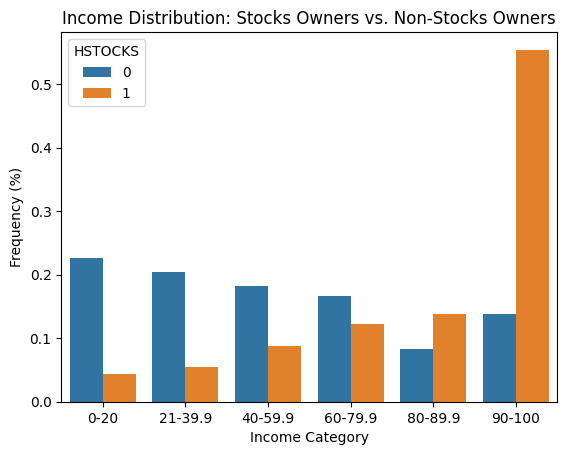

In [42]:
sns.barplot(data=df_inccat,x='INCCAT',y='Frequency',hue='HSTOCKS',order=inccat_dict.values())
plt.title("Income Distribution: Stocks Owners vs. Non-Stocks Owners")
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")

Text(0, 0.5, 'Home Value vs. Household Debt')

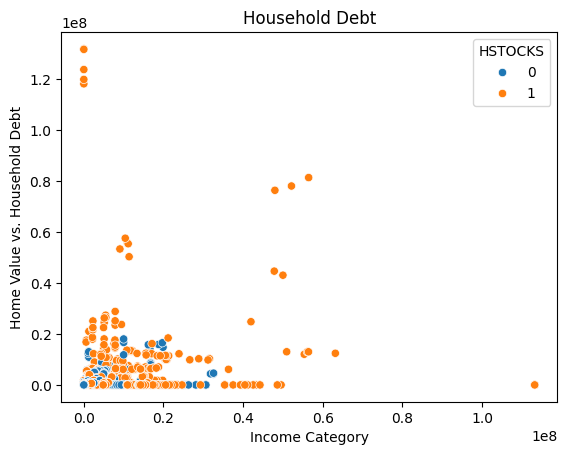

In [45]:
# How does stock ownership influence the relationship between house ownership and debt levels?
# Plot "HOUSES" vs "DEBT" with hue as Stocks ownership
sns.scatterplot(data=df,x="HOUSES",y="DEBT",hue="HSTOCKS")
plt.title("Household Debt")
plt.xlabel("Income Category")
plt.ylabel("Home Value vs. Household Debt")

In [53]:
#This analysis will focus on data related to households that own stocks and have an income of less than $500,000
mask = (df["HSTOCKS"]==1)&(df["INCOME"]<500_000)
df_small_investors = df[mask]
print("df_small_investors shape:", df_small_investors.shape)
df_small_investors.head()

df_small_investors shape: (4070, 357)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
10,3,31,678.869307,1,68,5,14,4,1,0,...,5,6,6,6,3,12,11,11,4,4
11,3,32,671.832370,1,68,5,14,4,1,0,...,5,6,6,6,3,12,11,11,4,4
12,3,33,619.953349,1,68,5,14,4,1,0,...,5,6,6,6,3,12,11,11,4,4
13,3,34,691.513595,1,68,5,14,4,1,0,...,5,6,6,6,3,12,11,11,4,4
25,6,61,3486.222888,1,74,5,12,4,1,0,...,5,6,6,6,3,11,10,10,4,4


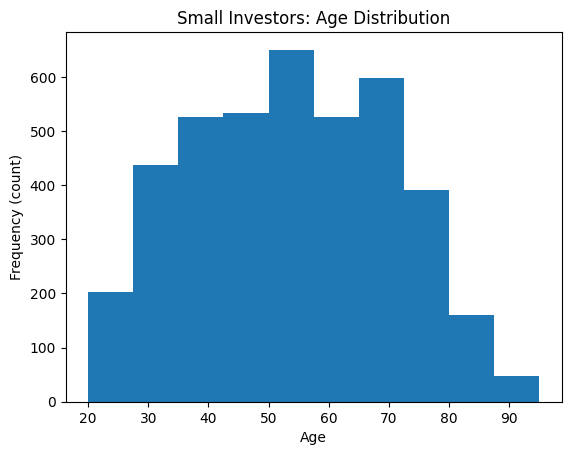

In [59]:
#What is the age distribution of small investors in the dataset?
plt.hist(df_small_investors["AGE"],bins=10)
plt.title("Small Investors: Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency (count)");

In [61]:
top_ten_trim_var = pd.Series(df_small_investors.apply(trimmed_var).sort_values().tail(10))
top_ten_trim_var

,0
RETQLIQ,8.056041e+10
DEQ,8.576604e+10
HOUSES,1.200833e+11
NHNFIN,1.426933e+11
KGTOTAL,2.312477e+11
EQUITY,2.505928e+11
NFIN,4.995007e+11
FIN,7.405178e+11
NETWORTH,2.330090e+12
ASSET,2.526308e+12


In [64]:
# Create horizontal bar chart of `top_ten_trim_var`
fig = px.bar(top_ten_trim_var,orientation="h",title="Small Investors: High Variance Features")
fig.update_layout(xaxis_title="Trimmed Variance [$]",yaxis_title ="Feature" )

In [65]:
high_var_cols = top_ten_trim_var.tail(5).index.to_list()

high_var_cols

['EQUITY', 'NFIN', 'FIN', 'NETWORTH', 'ASSET']

#Split

In [67]:
X = df_small_investors[high_var_cols]
print("X shape:", X.shape)
X.head()

X shape: (4070, 5)


,EQUITY,NFIN,FIN,NETWORTH,ASSET
10,60482000.0,684700.0,60492890,43597590.0,61177590.0
11,60377000.0,620030.0,60671480,44451510.0,61291510.0
12,60332000.0,1321600.0,60765290,41056890.0,62086890.0
13,60468565.0,2242700.0,60477480,44730180.0,62720180.0
25,4520750.0,1615000.0,5728000,7232000.0,7343000.0


#Build Model

##Iterate

In [68]:
n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters :
    model = make_pipeline(StandardScaler(),KMeans(n_clusters=k, random_state=42))
    model.fit(X)
    inertia_errors.append(model.named_steps['kmeans'].inertia_)
    silhouette_scores.append(silhouette_score(X,model.named_steps['kmeans'].labels_))
print("Inertia:", inertia_errors[:11])
print()
print("Silhouette Scores:", silhouette_scores[:3])

Inertia: [6162.991209616826, 4118.771840631897, 2963.3754147035156, 2012.1672941539512, 1633.507420857978, 1104.487136776835, 992.7457776581415, 830.5570383804304, 639.6316089581966, 497.0578909556696, 361.1668669812181]

Silhouette Scores: [0.9866813446540131, 0.9613175020993011, 0.9612903645917238]


In [69]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(x=n_clusters,y=inertia_errors,title="Number of Clusters")
fig.update_layout(xaxis_title="Number of Clusters",yaxis_title="Inertia")
fig.show()

In [70]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = px.line(x=n_clusters,y=silhouette_scores,title="Number of Clusters")
fig.update_layout(xaxis_title="Number of Clusters",yaxis_title="Silhouette Score")
fig.show()

In [71]:
final_model = make_pipeline(StandardScaler(),KMeans(n_clusters=4, random_state=42))
final_model.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=4, random_state=42))])

#Communicate

In [72]:
final_model.named_steps["kmeans"].labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [74]:
labels = final_model.named_steps["kmeans"].labels_
xgb = X.groupby(labels).mean()
xgb

,EQUITY,NFIN,FIN,NETWORTH,ASSET
0,7.998205e+05,2.112405e+06,1.338238e+06,3.215018e+06,3.450643e+06
1,1.325443e+08,3.623819e+08,1.839173e+08,5.451526e+08,5.462992e+08
2,3.790709e+07,1.555111e+08,4.672495e+07,1.985622e+08,2.022361e+08
3,5.617476e+07,9.604357e+08,1.155318e+08,1.060061e+09,1.075968e+09


In [75]:
# Create side-by-side bar chart of `xgb`
fig=px.bar(xgb,barmode='group',title="Small Investors Finances by Cluster")
fig.update_layout(xaxis_title="Cluster",yaxis_title="Value [$]")
fig.show()

In [77]:
# Instantiate transformer
pca = PCA(n_components=2)

# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t,columns=["PC1","PC2"])

print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca shape: (4070, 2)


,PC1,PC2
0,5.837867e+07,8.391913e+07
1,5.893298e+07,8.417802e+07
2,5.775686e+07,8.343647e+07
3,6.079323e+07,8.351470e+07
4,-2.746989e+06,5.746064e+06


In [78]:
# Create scatter plot of `PC2` vs `PC1`
fig = px.scatter(X_pca,
                 x="PC1",
                 y="PC2",color=labels.astype(str),
                title="PCA Representation of Clusters")
fig.update_layout(xaxis_title="PC1",yaxis_title="PC2");
fig.show()